# Feature selection and Logit Transformation

With all the hype and ML competition focus on deep learning while making incredibly complex models that will likely never be pushed into production, manual feature selection and feature engineering is becoming a lost skill set.

This is a brief tutorial using a small data set to illustrate some of the pitfalls with correlation and how we can improve results with once-common feature engineering techniques.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
from math import sqrt
import seaborn as sns

In [2]:
df = pd.read_csv('data/auto-mpg.csv')

In [3]:
df.head()

,MPG,CYLINDERS,DISPLACEMENT,HORSEPOWER,WEIGHT,ACCELERATION,MODELYEAR,NAME
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


we can drop HORSEPOWER or clean up the column since we have so few variables in this data set, we will clean it up

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
MPG             398 non-null float64
CYLINDERS       398 non-null int64
DISPLACEMENT    398 non-null float64
HORSEPOWER      398 non-null object
WEIGHT          398 non-null int64
ACCELERATION    398 non-null float64
MODELYEAR       398 non-null int64
NAME            398 non-null object
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


We see that there are 398 total, but we are not sure if they are all numbers.
Let's write a quick function to see.

In [5]:
for num in df['HORSEPOWER']:
    if num.isnumeric() == False:
        print(num)
    else:
        pass

?
?
?
?
?
?


'?' is being used to replace unknown values. Let us replace that with a number to standout and later replace with median

In [6]:
df['HP'] = df['HORSEPOWER'].replace(['?','99999'])

In [7]:
# if we removed all the '?'
# then nothing will output
for num in df['HP']:
    if num.isnumeric() == False:
        print(num)
    else:
        pass

Now convert to 'int'

In [8]:
df['HP'] = df['HP'].astype('int')

Here we see we have HP as 'int'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
MPG             398 non-null float64
CYLINDERS       398 non-null int64
DISPLACEMENT    398 non-null float64
HORSEPOWER      398 non-null object
WEIGHT          398 non-null int64
ACCELERATION    398 non-null float64
MODELYEAR       398 non-null int64
NAME            398 non-null object
HP              398 non-null int64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


We used 99999 as an int filler. Replace that value with the median.

In [10]:
median = df['HP'].median()
print(median)

92.5


In [11]:
df['HP'].replace([99999, median])

0      130
1      165
2      150
3      150
4      140
5      198
6      220
7      215
8      225
9      190
10     170
11     160
12     150
13     225
14      95
15      95
16      97
17      85
18      88
19      46
20      87
21      90
22      95
23     113
24      90
25     215
26     200
27     210
28     193
29      88
      ... 
368     88
369     88
370     85
371     84
372     90
373     92
374     92
375     74
376     68
377     68
378     63
379     70
380     88
381     75
382     70
383     67
384     67
385     67
386    110
387     85
388     92
389    112
390     96
391     84
392     90
393     86
394     52
395     84
396     79
397     82
Name: HP, Length: 398, dtype: int64

We now see which values we will use to predict MPG

In [12]:
df.describe()

,MPG,CYLINDERS,DISPLACEMENT,WEIGHT,ACCELERATION,MODELYEAR,HP
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,104.178392
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,38.294837
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,46.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,75.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,92.500000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,125.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,230.000000


In [13]:
y = df['MPG'].values

In [14]:
x = df.drop(['MPG','HORSEPOWER','NAME'], axis=1)

Now let's split the data set into 70% training and 30% test

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3)

In [16]:
model = LinearRegression()

In [17]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
pred = model.predict(x_test)

R^2:  0.823870918
RMSE:  3.1516201480958834


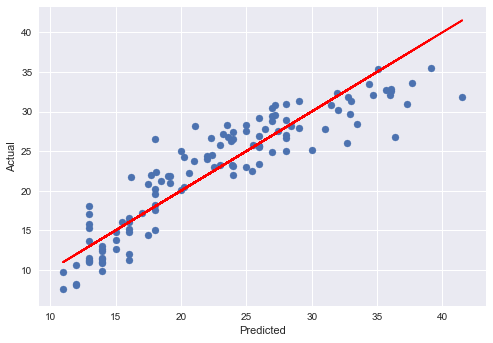

In [19]:
plt.plot(y_test, y_test, color='red') # red line of actual values
plt.scatter(y_test, pred)
plt.xlabel('Predicted')
plt.ylabel('Actual')
print('R^2: ', metrics.r2_score(y_test,pred))
print('RMSE: ', sqrt(metrics.mean_squared_error(y_test, pred)))

##### Now we have a baseline

Can we improve accuracy without changing from a linear regression model?

In [20]:
df.corr()

,MPG,CYLINDERS,DISPLACEMENT,WEIGHT,ACCELERATION,MODELYEAR,HP
MPG,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,-0.777685
CYLINDERS,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,0.842627
DISPLACEMENT,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,0.897192
WEIGHT,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,0.864040
ACCELERATION,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,-0.686334
MODELYEAR,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,-0.417302
HP,-0.777685,0.842627,0.897192,0.864040,-0.686334,-0.417302,1.000000


Let's drop acceleration and modelyear as they have the lowest correlation with MPG

In [21]:
x = df.drop(['MPG','HORSEPOWER','NAME','ACCELERATION','MODELYEAR'], axis=1)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3)

In [23]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
pred = model.predict(x_test)

R^2:  0.641350294559
RMSE:  4.809769855310567


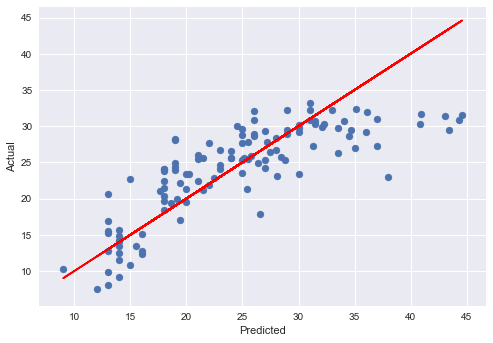

In [25]:
plt.plot(y_test, y_test, color='red')
plt.scatter(y_test, pred)
plt.xlabel('Predicted')
plt.ylabel('Actual')
print('R^2: ', metrics.r2_score(y_test,pred))
print('RMSE: ', sqrt(metrics.mean_squared_error(y_test, pred)))

#### Notice our accuracy score is worse
Even though a correlation matrix intuitively makes sense, keeping only the high correlation variables made the RMSE worse

### Did we miss something? We focused on correlation to MPG, but we didn't look at other variables
Let's bring in seaborn to make a better visualization of the correlation matrix

In [26]:
corr = df.corr()

In [27]:
print(corr)

                   MPG  CYLINDERS  DISPLACEMENT    WEIGHT  ACCELERATION  \
MPG           1.000000  -0.775396     -0.804203 -0.831741      0.420289   
CYLINDERS    -0.775396   1.000000      0.950721  0.896017     -0.505419   
DISPLACEMENT -0.804203   0.950721      1.000000  0.932824     -0.543684   
WEIGHT       -0.831741   0.896017      0.932824  1.000000     -0.417457   
ACCELERATION  0.420289  -0.505419     -0.543684 -0.417457      1.000000   
MODELYEAR     0.579267  -0.348746     -0.370164 -0.306564      0.288137   
HP           -0.777685   0.842627      0.897192  0.864040     -0.686334   

              MODELYEAR        HP  
MPG            0.579267 -0.777685  
CYLINDERS     -0.348746  0.842627  
DISPLACEMENT  -0.370164  0.897192  
WEIGHT        -0.306564  0.864040  
ACCELERATION   0.288137 -0.686334  
MODELYEAR      1.000000 -0.417302  
HP            -0.417302  1.000000  


### Here we can see much easier that CYLINDERS, DISPLACEMENT, and WEIGHT are highly correlated with one another

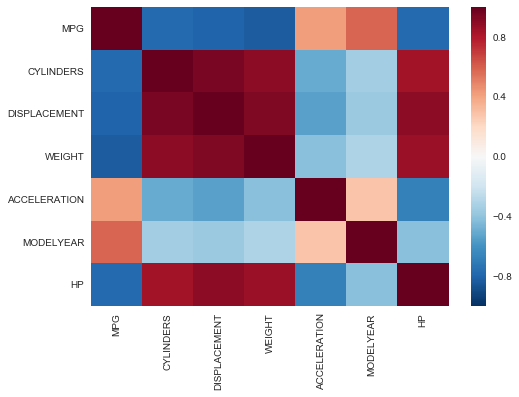

In [28]:
sns.heatmap(corr)

Weight has the strongest correlation with MPG, so we will drop CYLINDERS and DISPLACEMENT

In [29]:
x = df.drop(['MPG','HORSEPOWER','NAME','CYLINDERS','DISPLACEMENT'], axis=1)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3)

In [31]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
pred = model.predict(x_test)

R^2:  0.845211676354
RMSE:  3.0111128780630296


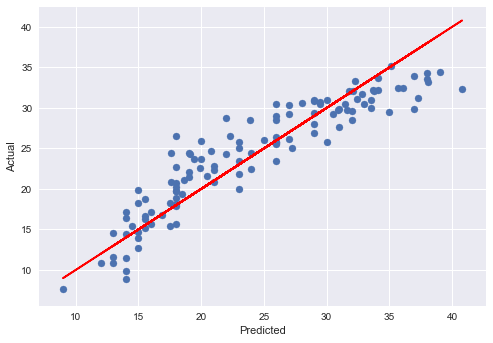

In [33]:
plt.plot(y_test, y_test, color='red')
plt.scatter(y_test, pred)
plt.xlabel('Predicted')
plt.ylabel('Actual')
print('R^2: ', metrics.r2_score(y_test,pred))
print('RMSE: ', sqrt(metrics.mean_squared_error(y_test, pred)))

#### It improved! 
#### The improvement isn't much but it is a step in the right direction
###### All variables: RMSE:  3.1516201480958834
###### Removed correlated variables: RMSE:  3.0111128780630296

# Log transformation
We can do this for modeling but remember to transform back when determining RMSE

Here we use numpy to transform the variables to their natural log

In [34]:
y = np.log(df['MPG'].values)

In [35]:
x = np.log(df.drop(['MPG','HORSEPOWER','NAME','CYLINDERS','DISPLACEMENT'], axis=1))

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3)

In [37]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
pred = model.predict(x_test)

Remember to transform back

In [39]:
y_test = np.exp(y_test)
pred = np.exp(pred)

R^2:  0.881115070543
RMSE:  2.5710589009164093


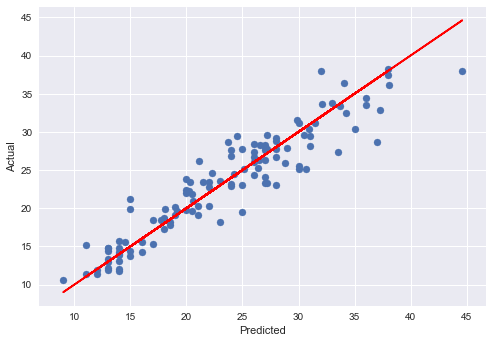

In [40]:
plt.plot(y_test, y_test, color='red')
plt.scatter(y_test, pred)
plt.xlabel('Predicted')
plt.ylabel('Actual')
print('R^2: ', metrics.r2_score(y_test,pred))
print('RMSE: ', sqrt(metrics.mean_squared_error(y_test, pred)))

#### Let's try a slightly more sophisticated algorithm now that we have a more accurate baseline model

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
rfr = RandomForestRegressor(random_state=42)

In [43]:
#y = np.log(df['MPG'].values)
y = df['MPG'].values

In [44]:
#x = np.log(df.drop(['MPG','HORSEPOWER','NAME','CYLINDERS','DISPLACEMENT'], axis=1))
x = df.drop(['MPG','HORSEPOWER','NAME','CYLINDERS','DISPLACEMENT'], axis=1)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3)

In [46]:
x_train = np.log(x_train)
x_test = np.log(x_test)
y_train = np.log(y_train)
y_test = np.log(y_test)

In [47]:
rfr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [48]:
pred = rfr.predict(x_test)

In [49]:
# remember to transform back
y_test = np.exp(y_test)
pred = np.exp(pred)

R^2:  0.842726729237
RMSE:  2.9385967644653435


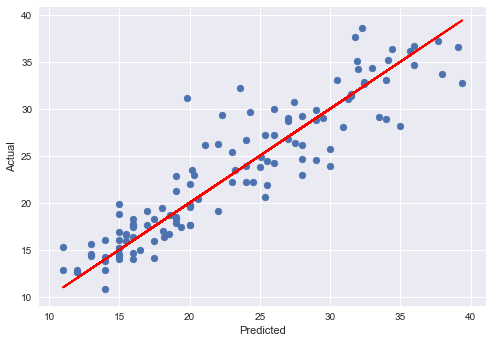

In [50]:
# Plot our predictions vs actual
plt.plot(y_test, y_test, color='red') # line of actual values
plt.scatter(y_test, pred)
plt.xlabel('Predicted')
plt.ylabel('Actual')
print('R^2: ', metrics.r2_score(y_test,pred))
print('RMSE: ', sqrt(metrics.mean_squared_error(y_test, pred)))

Default is only 10 trees. Let's start with 100 and move up to 1,000
Remember to set the random_state to reproduce results

In [52]:
y_test = np.log(y_test)

In [53]:
for i in range(1,11):
    n = i*100
    rfr = RandomForestRegressor(n_estimators=n, random_state=42, oob_score=True)
    rfr.fit(x_train, y_train)
    pred = rfr.predict(x_test)
    y_test = np.exp(y_test)
    pred = np.exp(pred)
    print('n_estimators: ', n)
    print('R^2: ', metrics.r2_score(y_test,pred))
    print('RMSE: ', sqrt(metrics.mean_squared_error(y_test, pred)))
    print('-'*25)
    y_test = np.log(y_test)

n_estimators:  100
R^2:  0.885765286246
RMSE:  2.5044455016115283
-------------------------
n_estimators:  200
R^2:  0.886035285642
RMSE:  2.5014840602830133
-------------------------
n_estimators:  300
R^2:  0.883083292565
RMSE:  2.5336745256021485
-------------------------
n_estimators:  400
R^2:  0.885222105032
RMSE:  2.5103927063280818
-------------------------
n_estimators:  500
R^2:  0.884488644995
RMSE:  2.5184009580011115
-------------------------
n_estimators:  600
R^2:  0.88347185995
RMSE:  2.529460745316997
-------------------------
n_estimators:  700
R^2:  0.883260105357
RMSE:  2.531757966474078
-------------------------
n_estimators:  800
R^2:  0.882459234727
RMSE:  2.540427431940924
-------------------------
n_estimators:  900
R^2:  0.882837538811
RMSE:  2.5363359637449734
-------------------------
n_estimators:  1000
R^2:  0.88349085823
RMSE:  2.5292545403513125
-------------------------


# Final Results

#### Linear regression with all features
RMSE:  3.1516201480958834
#### Linear regression with features highly correlated to target
RMSE:  4.809769855310567
#### Linear regression with manual feature selection and log transformation
##### RMSE:  2.5710589009164093
#### Default random forest with manual feature selection and log transformation
RMSE:  2.9385967644653435
#### Random forest with 400 trees, manual feature selection, and log transformation
##### RMSE:  2.5103927063280818

### The results above illustrate how a simple model using classic statistical techniques can compete in performance with more sophisticated models